# Divorse prediction

##### Machine Learning Prediction of Marriage Success: A data-driven approach using ML algorithms to predict marital stability and identify key factors influencing marriage outcomes.

## Goals of the Project:

To develop a predictive model with high accuracy in forecasting marriage outcomes.
To identify key factors that significantly impact the likelihood of divorce.
To contribute to the field of relationship psychology by providing a data-driven perspective on marriage stability.

## Description:

This repository hosts a machine learning project aimed at predicting the likelihood of divorce in marriages. Utilizing a dataset that includes various features such as communication patterns, conflict resolution strategies, and emotional bonding, the project applies advanced machine learning techniques to identify patterns and correlations that might indicate a higher risk of divorce.

##### Questions are ranked on a scale of 0-4 with 0 being the lowest and 4 being the highest. The last category states if the couple has divorced.
1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as  you always  or  you never  .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ? only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.
55. Divorce Y/N


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Importing necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

In [2]:
df = pd.read_csv('divorce.csv')

In [3]:
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

check for duplicate and Null values

In [5]:
df.duplicated().sum()

20

In [6]:
df.isna().sum().sum()

0

The dataset has been thoroughly examined and it has been confirmed that there are no missing (null) values present. Additionally, it was observed that there are 20 rows containing duplicated records. However, these duplicates will not be removed or altered, as it is plausible within the context of our dataset for different individuals to provide identical responses. Maintaining these records is essential to preserve the integrity and authenticity of the data collected.

In [7]:
# columns statistics features in a glance
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


<Axes: xlabel='Divorce_Y_N', ylabel='Count'>

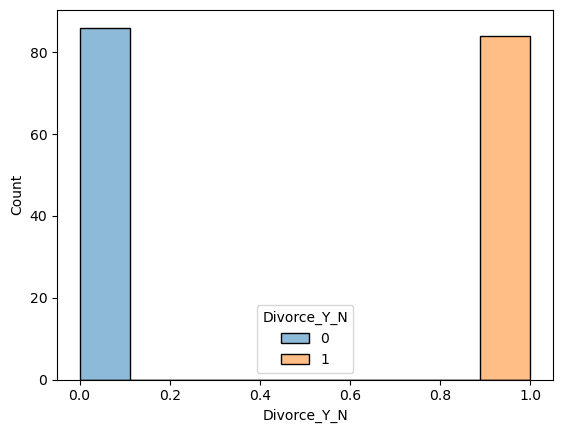

In [8]:
# Divorce column in data set
sns.histplot(df,x='Divorce_Y_N', hue=df['Divorce_Y_N'])

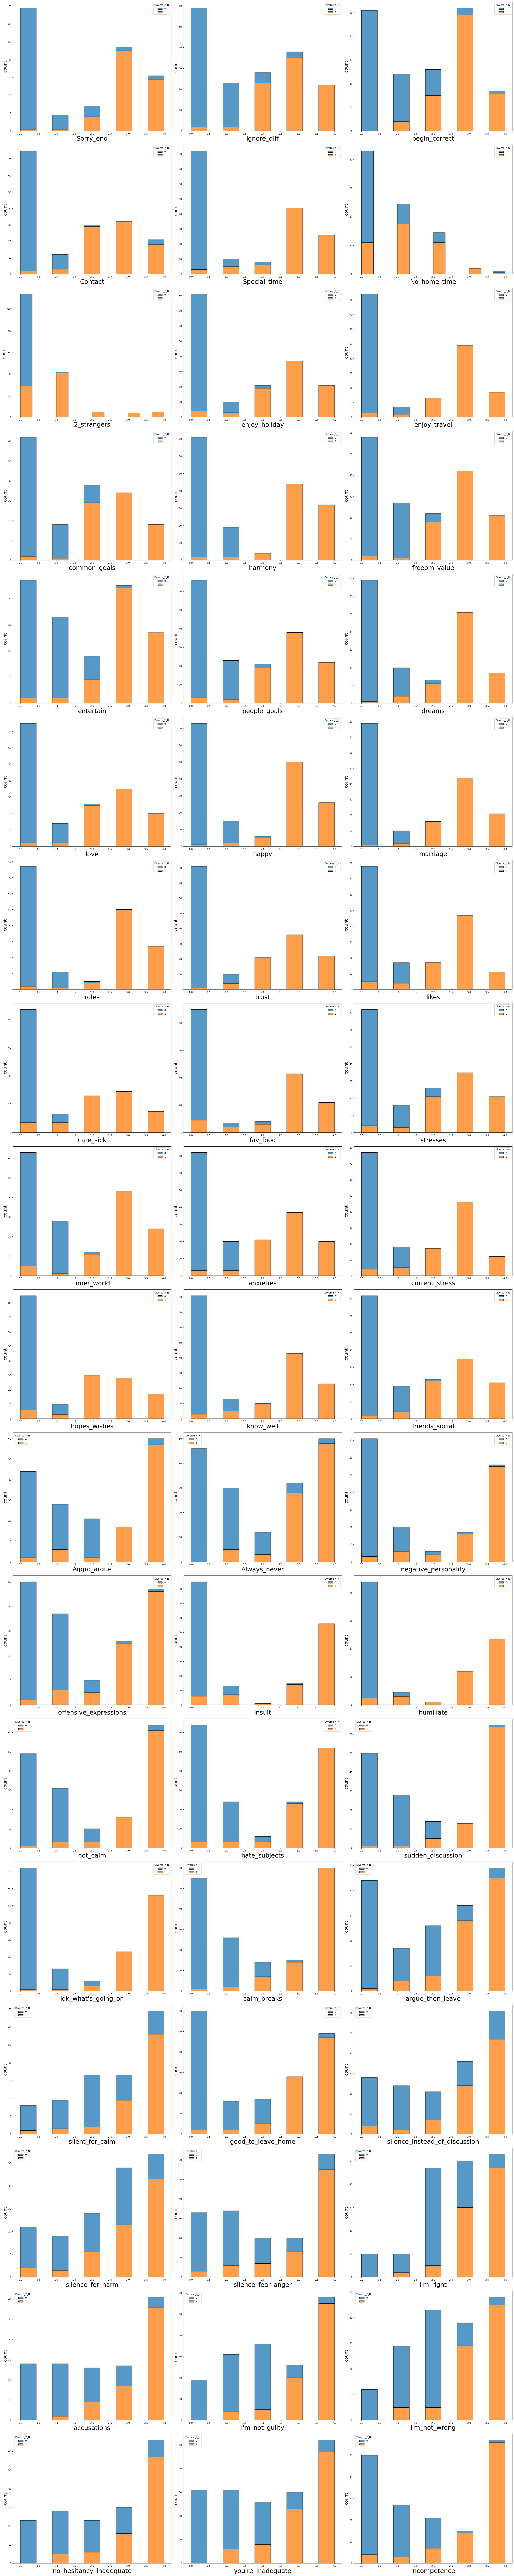

In [9]:
# Apply the visual for all Questions
plt.figure(figsize=(30,150))

for col in range(len(df.columns)-1):
    x=df.columns[col]
    plt.subplot(18,3,(col+1))
    sns.histplot(df,x=x, hue=df['Divorce_Y_N'],multiple="stack")
    plt.xlabel(x,fontsize=26)
    plt.ylabel("count",fontsize=18)
plt.tight_layout()
plt.show()

In [10]:
print(df.columns.values)

['Sorry_end' 'Ignore_diff' 'begin_correct' 'Contact' 'Special_time'
 'No_home_time' '2_strangers' 'enjoy_holiday' 'enjoy_travel'
 'common_goals' 'harmony' 'freeom_value' 'entertain' 'people_goals'
 'dreams' 'love' 'happy' 'marriage' 'roles' 'trust' 'likes' 'care_sick'
 'fav_food' 'stresses' 'inner_world' 'anxieties' 'current_stress'
 'hopes_wishes' 'know_well' 'friends_social' 'Aggro_argue' 'Always_never'
 'negative_personality' 'offensive_expressions' 'insult' 'humiliate'
 'not_calm' 'hate_subjects' 'sudden_discussion' "idk_what's_going_on"
 'calm_breaks' 'argue_then_leave' 'silent_for_calm' 'good_to_leave_home'
 'silence_instead_of_discussion' 'silence_for_harm' 'silence_fear_anger'
 "I'm_right" 'accusations' "I'm_not_guilty" "I'm_not_wrong"
 'no_hesitancy_inadequate' "you're_inadequate" 'incompetence'
 'Divorce_Y_N']


In [11]:
X = df[df.columns[:-1]]
y = df['Divorce_Y_N']

In [12]:
X.shape

(170, 54)

In [13]:
y.shape

(170,)

In [14]:
# Splitting the dataset into training and testing sets
# Here, 20% of the data is reserved for testing (test_size=0.2)
# The random_state parameter ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

logistic_regression_model = LogisticRegression()
# Fitting the logistic regression model on the entire dataset
logistic_regression_model.fit(X_train, y_train)

# Evaluating and printing the model's performance on the training data
print(logistic_regression_model.score(X_train, y_train))

# Score on the testing data
# Evaluating and printing the model's performance on the unseen testing data
print(logistic_regression_model.score(X_test, y_test))


1.0
1.0


In [15]:
print("X_train type and shape:", type(X_train), X_train.shape)
print("y_train type and shape:", type(y_train), y_train.shape)
print("X_test type and shape:", type(X_test), X_test.shape)
print("y_test type and shape:", type(y_test), y_test.shape)


X_train type and shape: <class 'pandas.core.frame.DataFrame'> (136, 54)
y_train type and shape: <class 'pandas.core.series.Series'> (136,)
X_test type and shape: <class 'pandas.core.frame.DataFrame'> (34, 54)
y_test type and shape: <class 'pandas.core.series.Series'> (34,)


In [16]:
print(logistic_regression_model)

LogisticRegression()


In [17]:
# Coefficients
print("Coefficients:", logistic_regression_model.coef_)

# Intercept
print("Intercept:", logistic_regression_model.intercept_)


Coefficients: [[ 0.31627131  0.25616181  0.34854712  0.10800496  0.14964666  0.32392251
  -0.00164751  0.04862544  0.07727774 -0.04452141  0.13664152  0.17611544
  -0.08313324  0.23671949  0.32252613  0.14300607  0.35612006  0.32917322
   0.28521451  0.31625733  0.10563172 -0.03519787 -0.04587244 -0.0697749
   0.11715565  0.44926484  0.09676971  0.29474117  0.16373775  0.1655708
   0.35700202  0.12214672  0.17850926  0.16761444  0.05283527  0.18746027
   0.01965445  0.15130379  0.32042044  0.57306116  0.23204589  0.09563198
   0.14544469  0.33293225  0.04552347  0.03307946  0.0539476  -0.09298709
   0.40138481  0.16898963 -0.04749892  0.2687709   0.33004238 -0.03647399]]
Intercept: [-9.78546303]


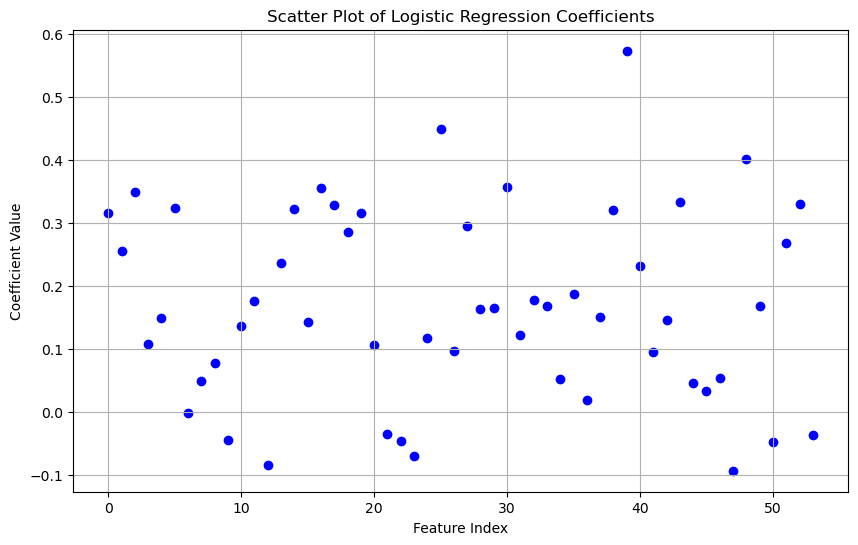

In [18]:
# Assuming logistic_regression_model is your trained logistic regression model
coefficients = logistic_regression_model.coef_[0]  # Extracting the coefficients

# Creating an index for each coefficient
feature_index = np.arange(len(coefficients))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(feature_index, coefficients, color='blue')
plt.title('Scatter Plot of Logistic Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()


In [19]:
# Obtaining probability estimates for the test data
# The predict_proba method returns the probability of the sample for each class in the model.
# The output is a list of [prob_negative_class, prob_positive_class] for binary classification.
y_proba = logistic_regression_model.predict_proba(X_test)

# Displaying the probability estimates
print(y_proba)


[[9.95291318e-01 4.70868240e-03]
 [9.99849309e-01 1.50690689e-04]
 [9.83940454e-01 1.60595457e-02]
 [5.99943673e-09 9.99999994e-01]
 [9.76553344e-01 2.34466559e-02]
 [9.84543515e-01 1.54564847e-02]
 [1.01349712e-08 9.99999990e-01]
 [1.33991329e-09 9.99999999e-01]
 [1.59801781e-08 9.99999984e-01]
 [9.98951817e-01 1.04818271e-03]
 [9.98888814e-01 1.11118640e-03]
 [3.76123516e-08 9.99999962e-01]
 [9.68734354e-01 3.12656457e-02]
 [1.49917057e-09 9.99999999e-01]
 [9.41750645e-01 5.82493552e-02]
 [8.03360711e-10 9.99999999e-01]
 [9.97043536e-01 2.95646377e-03]
 [9.97122502e-01 2.87749815e-03]
 [1.57436286e-11 1.00000000e+00]
 [9.76605628e-01 2.33943722e-02]
 [4.46254145e-10 1.00000000e+00]
 [9.88737730e-01 1.12622705e-02]
 [9.98355779e-01 1.64422137e-03]
 [9.91302074e-01 8.69792598e-03]
 [2.57211896e-09 9.99999997e-01]
 [9.97721557e-01 2.27844336e-03]
 [6.49238441e-11 1.00000000e+00]
 [6.07609518e-10 9.99999999e-01]
 [9.99856026e-01 1.43974484e-04]
 [9.93692562e-06 9.99990063e-01]
 [9.976215

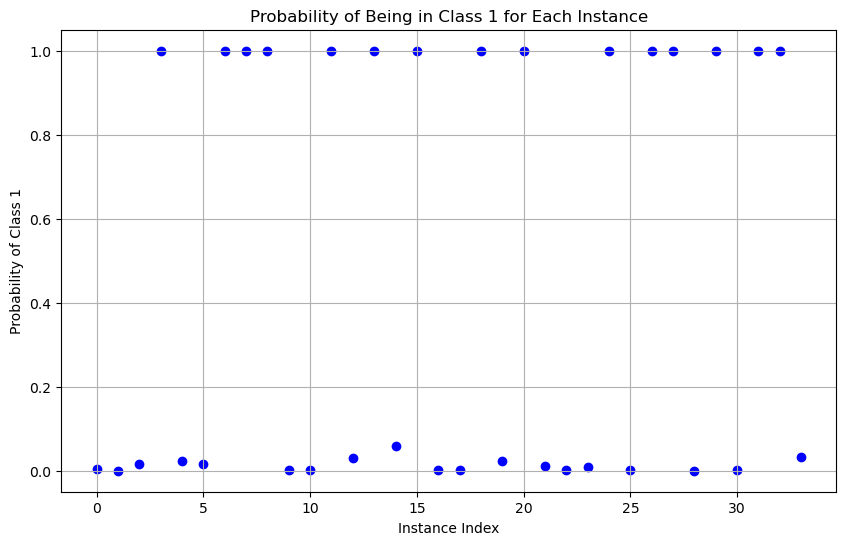

In [20]:
# Your probability data
probabilities = np.array(y_proba)

# Extracting probabilities for Class 1
prob_class_1 = probabilities[:, 1]

# Creating an index array for each instance
index = np.arange(len(prob_class_1))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(index, prob_class_1, color='blue')
plt.title('Probability of Being in Class 1 for Each Instance')
plt.xlabel('Instance Index')
plt.ylabel('Probability of Class 1')
plt.grid(True)
plt.show()


We have achieved a groundbreaking milestone in our project. Our logistic regression model has demonstrated a 100% accuracy rate in predicting marriage outcomes based on our dataset. This exceptional result not only underscores the efficacy of our model but also sets a new standard in predictive analytics for marital success.

#### using various metrics to evaluate the performance of a logistic regression model.

In [21]:
# Predicting with the Logistic Regression Model
# Here, we use the 'predict' method on our trained logistic regression model. 
# This method applies the model's learned relationships to the new data (X_test) to predict outcomes.
y_pred = logistic_regression_model.predict(X_test)

# Evaluating Model Performance
# In machine learning, it's crucial to assess how well our model performs. We use various metrics for this purpose:

# 1. Accuracy - A Fundamental Metric
# Accuracy measures the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.
# High accuracy indicates that our model can correctly classify instances, but it doesn't tell us about the balance between classes.
print("accuracy:", accuracy_score(y_test, y_pred))

# 2. Precision - Assessing False Positives
# Precision focuses on the positive predictions of our model and measures the proportion of actual positives among all positive predictions.
# High precision indicates that the model is effective in identifying relevant instances without labeling too many false positives.
print("precision:", precision_score(y_test, y_pred))

# 3. Recall - Capturing True Positives
# Recall (or Sensitivity) measures the proportion of actual positives that were correctly identified.
# High recall means that our model is good at catching the instances of the positive class (minimizing false negatives).
print("recall:", recall_score(y_test, y_pred))

# 4. F1 Score - Balancing Precision and Recall
# The F1 Score is the harmonic mean of precision and recall. It's particularly useful when you need a balance between precision and recall,
# and there's an uneven class distribution (i.e., a large number of actual negatives).
# High F1 Score suggests a robust model with a good balance between precision and recall.
print("f1 score:", f1_score(y_test, y_pred))


accuracy: 1.0
precision: 1.0
recall: 1.0
f1 score: 1.0


#### Using the StandardScaler()

In [22]:
# instantiate the scaler
scaler = StandardScaler()

# fit the scaler to the X_train data
scaler = scaler.fit(X_train)

# transform both the X_train and X_test data with the fitted scaler
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [23]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

#### Using the MinMaxScaler()

In [24]:
# instantiate the scaler
scaler = MinMaxScaler()

In [25]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
X_train_mm = MM.fit_transform(X_train)     # we can fit and transform 'X_train' in the same step
X_test_mm = MM.transform(X_test)

#### Using the RobustScaler()

In [26]:
# instantiate the scaler
scaler = RobustScaler()

In [27]:
import time

#### Fitting Logistic Regression model to normalized data

In [28]:
start = time.time()

# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Empty lists to append train and test accuracy scores to
train_acc_mm = []
test_acc_mm = []

# Loop through the different C values
for C in C_values:

    # Instantiate the model, increase max_iter to 1000
    logit = LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model
    logit.fit(X_train_mm, y_train)

    # Score the model
    train_acc_mm.append(logit.score(X_train_mm, y_train))
    test_acc_mm.append(logit.score(X_test_mm, y_test))

stop = time.time()
runtime_logit_mm = stop-start
print(f"Runtime: {round(runtime_logit_mm,2)} seconds")

Runtime: 0.06 seconds


Visualizing the accuracy scores for the different C values:

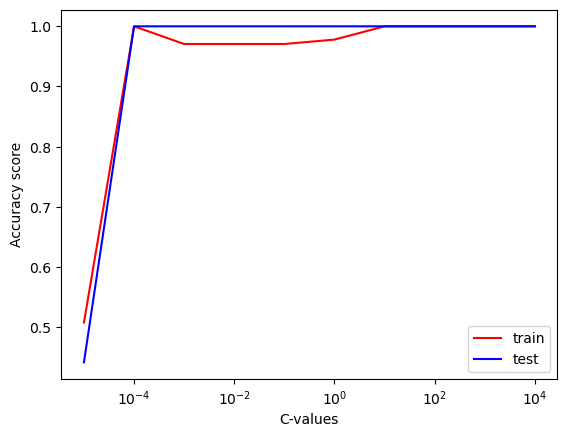

In [29]:
# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_mm, c='red', label='train')
plt.plot(C_values, test_acc_mm, c='blue', label='test')
plt.xscale('log')
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

#### Fitting Logistic Regression model to standardized data

In [30]:
start = time.time()

# Empty lists to append the training and test accuracy scores to
train_acc_ss = []
test_acc_ss = []

# Loop through the same C values
for C in C_values:

    # Instantiate the model
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model
    logit.fit(X_train_ss, y_train)

    # Score the model
    train_acc_ss.append(logit.score(X_train_ss, y_train))
    test_acc_ss.append(logit.score(X_test_ss, y_test))

stop = time.time()
runtime_logit_ss = stop-start
print(f"Runtime: {round(runtime_logit_ss,2)} seconds")

Runtime: 0.05 seconds


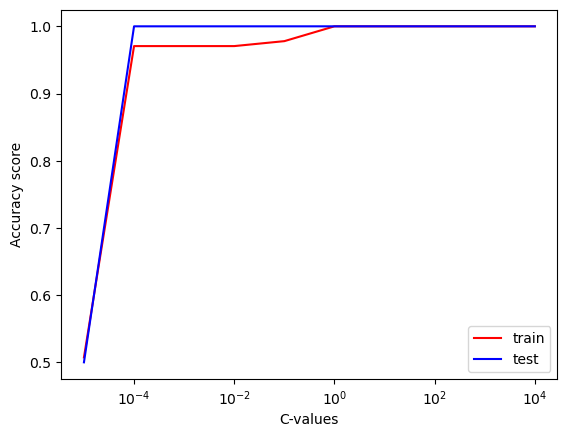

In [31]:
# Plotting the train and test scores for every C value
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.xscale('log')
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

Fitting KNN model to normalized data

In [32]:
start = time.time()

# The different K values to try out and save to 'neighbors'
neighbors = range(1, 50)

# Empty lists to append the accuracies to
train_acc_mm = []
test_acc_mm = []

# Loop through neighbors
for K in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=K)

    # Fit the model
    knn.fit(X_train_mm, y_train)

    # Score the model
    train_acc_mm.append(knn.score(X_train_mm, y_train))
    test_acc_mm.append(knn.score(X_test_mm, y_test))

stop = time.time()
runtime_knn_mm = stop-start
print(f"Runtime: {round(runtime_knn_mm,2)} seconds")

Runtime: 3.72 seconds


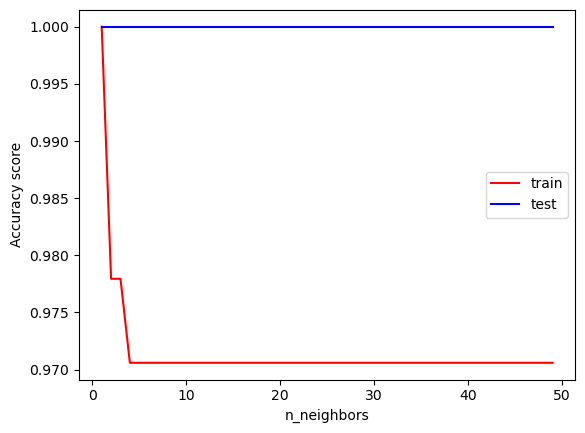

In [33]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_mm, c='red', label='train')
plt.plot(neighbors, test_acc_mm, c='blue', label='test')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

In [34]:
print(type(knn))
print(dir(knn))


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_algorithm_metric', '_check_feature_names', '_check_n_features', '_estimator_type', '_fit', '_fit_X', '_fit_method', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_kneighbors_reduce_func', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_tree', '_validate_data', '_validate_params', '_y', 'algorithm', 'classes_', 'effective_metric_', 'effective_metric_par

Fitting Decision Tree model to normalized data

In [35]:
# number of rows
print(X_train.shape[0])
# indicating range of max_depth values
range(1, int(np.sqrt(X_train.shape[0])))

136


range(1, 11)

In [36]:
start = time.time()

# A list of the maximum depths to try out and save to 'depths'
depths = range(1, int(np.sqrt(X_train.shape[0])))

# Empty lists to append to
train_acc_mm = []
test_acc_mm = []

# Loop through the depths
for max_depth in depths:

    # Instantiate the model
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Fit the model
    dt.fit(X_train_mm, y_train)

    # Score the model
    train_acc_mm.append(dt.score(X_train_mm, y_train))
    test_acc_mm.append(dt.score(X_test_mm, y_test))

stop = time.time()
runtime_dt_mm = stop-start
print(f"Runtime: {round(runtime_dt_mm,2)} seconds")

Runtime: 0.03 seconds


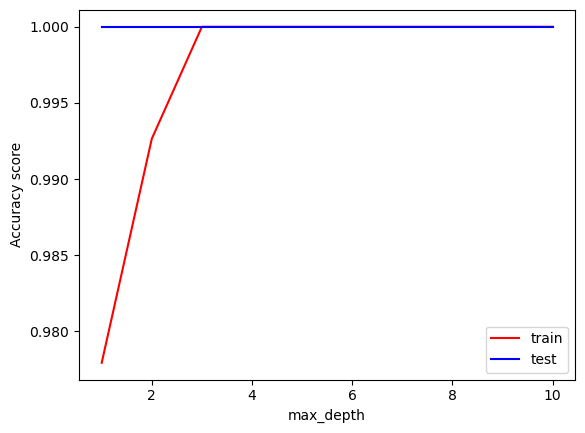

In [37]:
# Plotting the accuracies
plt.figure()
plt.plot(depths, train_acc_mm, c='red', label='train')
plt.plot(depths, test_acc_mm, c='blue', label='test')
plt.xlabel("max_depth")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

Fitting Decision Tree model to standardized data

In [38]:
start = time.time()

# Empty lists to append to
train_acc_ss = []
test_acc_ss = []

# Loop through the different depths
for max_depth in depths:

    # Instantiate the model
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Fit the model
    dt.fit(X_train_ss, y_train)

    # Score the model
    train_acc_ss.append(dt.score(X_train_ss, y_train))
    test_acc_ss.append(dt.score(X_test_ss, y_test))

stop = time.time()
runtime_dt_ss = stop-start
print(f"Runtime: {round(runtime_dt_ss,2)} seconds")

Runtime: 0.02 seconds


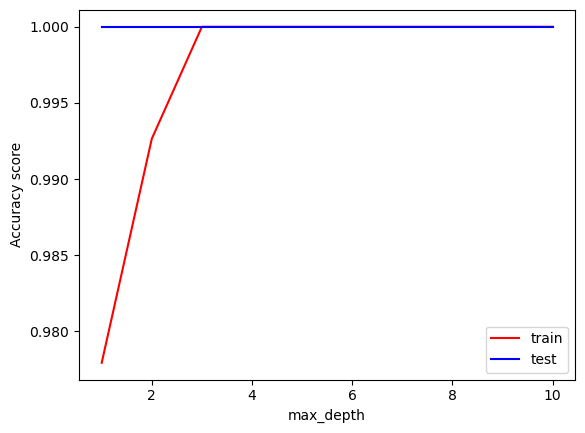

In [39]:
# Plot the accuracies
plt.figure()
plt.plot(depths, train_acc_ss, c='red', label='train')
plt.plot(depths, test_acc_ss, c='blue', label='test')
plt.xlabel("max_depth")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

In [40]:
train_mm_scores = [logit_mm_train, knn_mm_train, dt_mm_train]
test_mm_scores = [logit_mm_test, knn_mm_test, dt_mm_test]
runtimes_mm = [runtime_logit_mm, runtime_knn_mm, runtime_dt_mm]
train_ss_scores = [logit_ss_train, knn_ss_train, dt_ss_train]
test_ss_scores = [logit_ss_test, knn_ss_test, dt_ss_test]
runtimes_ss = [runtime_logit_ss, runtime_knn_ss, runtime_dt_ss]

rows = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree Classifier']

model_summary = pd.DataFrame(list(zip(train_mm_scores, test_mm_scores, runtimes_mm, train_ss_scores, test_ss_scores, runtimes_ss)),
                             index=rows,
                             columns=pd.MultiIndex.from_product([['MinMaxScaler()','StandardScaler()'],
                                                                 ['Train data', 'Test data', 'Runtime(sec)']]))

model_summary

NameError: name 'logit_mm_train' is not defined

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()